In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

# 1. Линейная регрессия

Идея линейных моделей заключается в том, чтобы суммировать значения признаков с некоторыми весами. Зависимость предсказываемого
значения от объясняющих переменных будет линейной, т.е. такой, что между зависимой переменной и объясняющими признаками можно
провести прямую:

$$a(x) = w_{0}+\left \langle w,x \right \rangle.$$

Параметрами таких моделей являются веса $w_{i}$. Вес $w_{0}$ называется _свободным коэффициентом_ или _сдвигом_. Сдвиг отвечает
за движение кривой "вниз-вверх". 
Оптимизация модели в таком случае заключается в подборе оптимальных значений весов, наилучшим образом аппроксимирующих зависимость $a(x)$ и $x$.
Важно то, что сдвиг делает модель неоднородной и затрудянет её дальнейшую оптимизацию.

Для устранения этого фактора обычно используют прием, позволяющий упростить запись: к признаковому описанию объекта добавляется 
еще один признак (константный), на каждом объекте равный единице. В этом случае вес при нем как раз будет по смыслу совпадать 
со свободным коэффициентом, и сам $w_{0}$ будет не нужен, поскольку получим фиктивный столбец $d+1$ из единиц. Тогда получим

$$a(x) = \sum^{d+1}_{i=1}w_{i}x^{i}=\left \langle w,x \right \rangle.$$

За счет простой формы линейные модели достаточно легко обучаются и позволяют работать с зашумленными данными, 
небольшими выборками, контролировать риск переобучения.

In [27]:
#целевой признак
y = np.random.randint(35, 85, 10)

In [23]:
#объясняющий признак
x = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

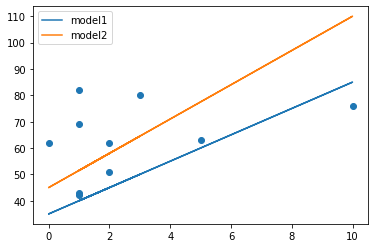

In [29]:
plt.scatter(x[1], y)

plt.plot(x[1], 35*x[0] + x[1]*5, label='model1')
plt.plot(x[1], 45*x[0] + x[1]*6.5, label='model2')
plt.legend(loc='best');

В качестве меры ошибки можно взять абсолютное отклонение истинного значения от прогноза $Q(a,y)=a(x)-y$, но тогда минимизация функционала ошибки (в которой и состоит задача обучения) будет достигаться при принятии им отрицательного значения. Например, если истинное значение ответа равно $10$, а алгоритм $a(x)$ выдает ответ $11$, отклонение будет равно $1$, а при значении предсказания равном $1$, отклонение будет равно $1-10=-9$. Значение ошибки во втором случае ниже, однако разница истинного значения и предсказания нашей модели больше. Таким образом, такой функционал ошибки не поддается минимизации. 

Логичным кажется решение использовать в качестве функционала ошибки модуль отклонения $Q(a,y)=|a(x)-y|$. Соответствующий функционал ошибки называется средним абсолютным отклонением (mean absolute error, MAE):

$$Q(a,x) = \frac{1}{l}\sum^{l}_{i=1}|a(x_{i})-y_{i}|.$$

Однако, зачастую методы оптимизации включают в себя дифференцирование, а функция модуля не является гладкой - она не имеет производной в нуле, поэтому ее оптимизация бывает затруднительной.

Поэтому сейчас основной способ измерить отклонение - посчитать квадрат разности $Q(a,y)=(a(x)-y)^{2}$. Такая функция является гладкой и имеет производную в каждой точке, а ее минимум достигается при равенстве истинного ответа $y$ и прогноза $a(x)$.

Основанный на этой функции функционал ошибки называется _среднеквадратичным отклонением_ (mean squared error, MSE):

$$Q(a,x) = \frac{1}{l}\sum^{l}_{i=1}(a(x_{i})-y_{i})^{2}.$$

Эти же метрики можно использовать в качестве измерения качества модели. Среднеквадратичную ошибку лучше использовать в тех 
ситуациях, когда важно учитывать смещения(абсолютное среднее значение неустойчиво к выбросам) и не нужна бизнес-интерпретация
результата(квадрат чего-либо не имеет экономического смысла).

# 2. Метод наименьших квадратов

Идея метода наименьших квадратов заключается в том, чтобы минимизировать квадратичную функцию ошибки, поскольку такая функция
всегда будет дифференциируемой, а найденную стационарную точку можно не проверять, поскольку эта точка всегда будет минимумом.
$$Q(w, X) = \frac{1}{l}||Xw-y||^{2}\rightarrow \underset{w}{\text{min}},$$

Пример с параболоидом ниже наглядно подтверждает это утверждение.

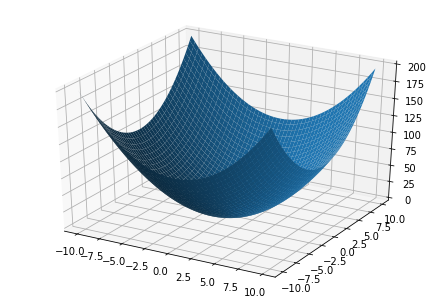

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import numpy

def makeData ():
    x = numpy.arange (-10, 10, 0.1)
    y = numpy.arange (-10, 10, 0.1)
    xgrid, ygrid = numpy.meshgrid(x, y)

    Ugrid = xgrid**2+ygrid**2
    return xgrid, ygrid, Ugrid

x, y, U = makeData()

fig = pylab.figure()
axes = Axes3D(fig)

axes.plot_surface(x, y, U)

pylab.show()

Продифференцировав это функцию ошибки по вектору $w$ и приравняв к нулю, можно получить явную анатилическую формулу 
для решения задачи минимизации:

$$w = (X^{T}X)^{-1}X^{T}y.$$

Это решение называется _нормальным уравнением_ линейной регрессии. Наличие аналитического решения кажется положительным 
фактором, однако, у него есть некоторые минусы, среди которых вычислительная сложность операции 
(обращение матрицы $X^{T}X$ будет иметь кубическую сложность от количества признаков $d^{3}$), 
а также тот факт, что матрица $X^{T}X$ может быть вырожденной(определитель равен 0) и поэтому необратимой. Тогда найти решение будет невозможно.

# 3. Градиентный спуск

_градиентом_ функции $f$ называется $n$-мерный вектор из частных производных. 

$$ \nabla f(x_{1},...,x_{d}) = \left(\frac{\partial f}{\partial x_{i}}\right)^{d}_{i=1}.$$

При этом известно, что __градиент задает направление наискорейшего роста функции__. Значит, антиградиент будет показывать направление ее скорейшего убывания.

Для решения задачи нам требуется определить некоторую стартовую точку и итерационно сдвигаться от нее в сторону антиградиента 
с определенным _шагом_ $\eta_{k}$, на каждом шагу пересчитывая градиент в точке, в которой мы находимся. Таким образом, 
имея начальный вектор весов $w^{0}$, $k$-й шаг градиентного спуска будет иметь вид

$$w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X).$$

Итерации следует продолжать, пока не наступает сходимость. Она определяется разными способами, но в даннном случае удобно 
определять как ситуацию, когда векторы весов от шага к шагу изменяются незначительно, то есть норма отклонения вектора весов 
на текущем шаге от предыдущего не привышает заданное значение $\varepsilon$:

$$||w^{k}-w^{k-1}|| < \varepsilon.$$

В случае многомерной регрессии формула принимает вид 

$$\nabla_{w}Q(w,X) = \frac{2}{l}X^{T}(Xw-y).$$

# 4. Примеры

### 4.1. Моделирование работы градиентного спуска.

In [181]:
np.random.seed(1000) #для воспроизводимости результата

In [182]:
# Возьмем 2 признака и 1000 объектов
n_features = 2
n_objects = 1000

In [183]:
#сгенерируем вектор истинных весов
w_true = np.random.normal(size=(n_features, ) )

In [184]:
#сгенерируем матрицу Х, вычислим Y с добавлением случайного шума
X = np.random.uniform(-7, 7, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, 0.5, size=(n_objects))

In [185]:
# возьмем нулевые начальные веса
w = np.zeros(n_features)

In [99]:
# функция для вычисления среднеквадратичной ошибки
def mseerror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [82]:
# функция для вычисления вектора весов по нормальному уравнению регрессии
def normal_equation(X, y):
    return np.linalg.solve((X.T).dot(X), (X.T).dot(Y))

In [83]:
normal_eq_w = normal_equation(X, Y)
print(f'В случае использования нормального уравнения функционал ошибки составляет {round(mseerror(X, normal_eq_w, Y), 4)}')

В случае использования нормального уравнения функционал ошибки составляет 0.2633


Обучим линейную регрессию путем градиентного спуска и получим графики изменения весов и ошибки

In [59]:
# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e4

# критерий сходимости(приращения весов, при которых алгоритм останавлиявается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

In [60]:
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mseerror(X, new_w, Y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования градиентного спуска функционал ошибки составляет 0.2633


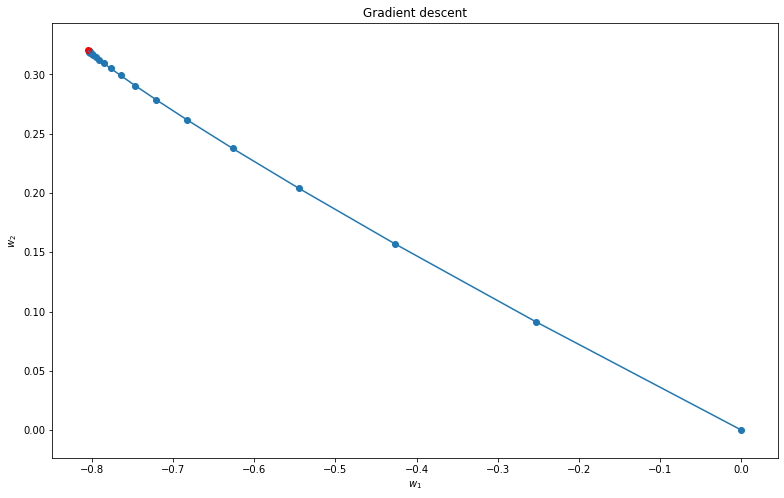

In [53]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 8))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0], w_true[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

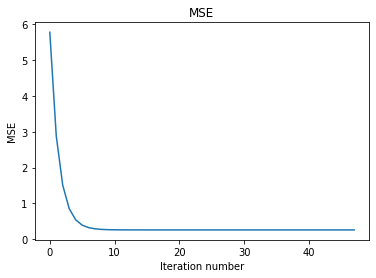

In [52]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Очень важно при использовании метода градиентного спуска правильно подбирать шаг. Если длина шага будет слишком мала, 
то метод будет слишком медленно приближаться к правильному ответу, и потребуется очень большое количество итераций для 
достижения сходимости. Если же длина наоборот будет слишком большой, появится вероятность "перепрыгивания" алгоритма 
через минимум функции или вообще отсутствия сходимости градиентного спуска.

Применяется методика использования переменного размера шага: на начальных этапах берется большой шаг, который с увеличением 
количества итераций снижается. Одна из таких методик - вычисление на каждой итерации размера шага по формуле

$$\eta_{k} = \frac{c}{k},$$

где $c$ - некоторая константа, а $k$ - номер шага.

### 4.2. Подбор скорости обучения (eta) и количества итераций градиентного спуска.

In [61]:
n_features = 2
n_objects = 1000
w_true = np.random.normal(size=(n_features, ) )
X = np.random.uniform(-7, 7, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, 0.5, size=(n_objects))

In [62]:
def w1_w2_plot():
    plt.figure(figsize=(13, 8))
    plt.title(' Eta-w dependency')
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')

    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.scatter(w_true[0], w_true[1], c='r')
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

In [63]:
def mse_plot():
    plt.figure(figsize=(13, 8))
    plt.plot(range(len(errors)), errors)
    plt.title('MSE')
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')

In [64]:
def mseerror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [65]:
def gradient_descent(n_features=None, n_objects=None,
                    eta=None, min_weight_dist=None, weight_dist=None, iter_num=None, max_iter=None,
                    verbose=False, plot=False):
    
    for item in eta:
        w = np.zeros(n_features)
        w_list = [w.copy()]
        w_true = np.random.normal(size=(n_features, ) )
        errors = []
        
        for value in max_iter:
            
            while weight_dist > min_weight_dist and iter_num < value:

                new_w = w - 2 * item * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
                weight_dist = np.linalg.norm(new_w - w, ord=2)

                w_list.append(new_w.copy())
                errors.append(mseerror(X, new_w, Y))

                iter_num += 1
                w = new_w
            
            if verbose:
                print(f'MSE при eta={item} и числе итераций={value} составляет {round(errors[-1], 4)}')

            if plot:
                w1_w2_plot()
                mse_plot()

In [66]:
gradient_descent(n_features=n_features, n_objects=n_objects,
                eta=np.array([0.001, 0.01, 0.1]), 
                min_weight_dist=1e-8,
                weight_dist=np.inf, 
                iter_num=0, 
                max_iter=np.array([100, 300]),
                verbose=True, plot=False)

MSE при eta=0.001 и числе итераций=100 составляет 0.2436
MSE при eta=0.001 и числе итераций=300 составляет 0.2405


IndexError: list index out of range

### 4.3. Избавление от ошибки в коде итераций по весам

In [ ]:
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
        if i % 100 == 0:
        print(i, W, err)

Особенность задачи заключается в том, что вектор ответов на отложенной выборке рассчитывается заранее.
Поэтому необходимо переделать функцию расчёта функционала ошибки и формулу расчёта весов так, чтобы вычисления происходили без объясняющих признаков.

In [25]:
n_features = 2
n_objects = 1000
W = np.zeros(n_features)
eta = 0.01

In [26]:
X = np.random.uniform(-10, 10, (n_objects, n_features))
Y = X.dot(W) + np.random.normal(0, 0.5, size=(n_objects))

In [27]:
def mseerror(Y, y_pred):
    return (sum((Y - y_pred)**2)) / len(Y)

In [28]:
for i in range(1000):
    
    y_pred = np.dot(X, W)
    err = mseerror(Y, y_pred)
    W -= 2 * eta * (np.sum(Y - y_pred))/Y.shape[0]
    
    if i % 100 == 0:
        print(i, W, err)

0 [0.00026855 0.00026855] 0.24401070788630813
100 [0.02068872 0.02068872] 0.2679242952439102
200 [0.0322476 0.0322476] 0.30597071282152266
300 [0.03879054 0.03879054] 0.33536038642795424
400 [0.04249419 0.04249419] 0.3545128358023314
500 [0.04459064 0.04459064] 0.366160405093046
600 [0.04577735 0.04577735] 0.3730118843894846
700 [0.04644909 0.04644909] 0.37697295856188673
800 [0.04682932 0.04682932] 0.3792416575435667
900 [0.04704456 0.04704456] 0.38053435864162016


Наглядно видим важность заранее задать критерий остановки, чтобы не тратить лишние ресурсы.